### This will be in the prepare module
    _Check for and remove duplicates by customer_id. - None
    
    _Remove redundant columns: payment_type_id, internet_service_type_id, contract_type_id, & customer_id. - Completed
        -Used the following to drop redundant columns
        -df = df.drop(['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], axis = 1)
        -df.head(2)
    
    _Encode payment_type(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)), internet_service_type(DSL, Fiber, None), contract_type(Month-to-month, One year, Two year), gender(male/female), partner(yes/no), multiple_line(yes/no), device_protection(yes/no), tech_support(yes/no), streaming_tv(yes/no), streaming_movies(yes/no), paperless_billing, & churn (yes/no).
    - gender is male(1) or not male(0)
    - yes(1) no(0)
    - payment, contract and service types (True = 1) (Fales = 0)
    
    _Check for nulls and fill (Fill in total_charges' blanks with 0). - Completed
        -#find empty values. Tried isna, isnull, notna, notnull but did not shown any matches.
            -df.eq(' ').sum()
        -Used .replace to empty values with a 0 in total charges.
            -df = df.replace({'total_charges': ' '}, 0)
            -df.head()

    _Convert total_charges to float64. - Completed
        -#convert 'total_charges' to float and validate change.
        - df['total_charges'] = df['total_charges'].astype(float)
        - df.dtypes
    
    _Replace 'No phone service' & 'No internet service' with 'No'. - Completed
        -df.replace(to_replace = 'No internet service', value = 'No')
        -df.replace(to_replace = 'No phone service', value = 'No')

In [1]:
#libraries
import acquire
import explore
import prepare
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Working code for project

# Acquire

In [2]:
df = acquire.get_telco_data()
df.head(1)

,payment_type_id,payment_type,internet_service_type_id,internet_service_type,contract_type_id,contract_type,customer_id,gender,senior_citizen,partner,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn
0,1,Electronic check,1,DSL,1,Month-to-month,0015-UOCOJ,Female,1,No,...,Yes,No,No,No,No,No,Yes,48.2,340.35,No


In [ ]:
#data summarization
df.describe(include='all').T

In [ ]:
df.info()

#### Initial visualization

In [ ]:
#plot charts on acquired data prior to data cleaning.
num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [ ]:
#value counts on acquired data prior to data cleaning.
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

#### From above:
    - From above plot charts and column value counts we find the following have no weight to churn rate and will be dropped:
        - Remove 'phone_service', 'internet_service', 'senior_citizen', 'paperless' & 'tech_support' (irrelevant)

# Clean

In [3]:
#added above to the prepare module.
df = prepare.clean_data(df)
df.head(1)

,tenure,monthly_charges,total_charges,dsl,fiber,no_internet,m2m,one_year_contract,two_year_contract,churned,...,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,autopayment,not_autopayment
0,7,48.2,340.35,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   int64  
 1   monthly_charges    7043 non-null   float64
 2   total_charges      7043 non-null   float64
 3   dsl                7043 non-null   uint8  
 4   fiber              7043 non-null   uint8  
 5   no_internet        7043 non-null   uint8  
 6   m2m                7043 non-null   uint8  
 7   one_year_contract  7043 non-null   uint8  
 8   two_year_contract  7043 non-null   uint8  
 9   churned            7043 non-null   uint8  
 10  is_male            7043 non-null   uint8  
 11  partner            7043 non-null   uint8  
 12  dependents         7043 non-null   uint8  
 13  phone_service      7043 non-null   uint8  
 14  multiple_lines     7043 non-null   uint8  
 15  online_security    7043 non-null   uint8  
 16  online_backup      7043 

# Split your data into train, validate, and test samples.

In [4]:
train, validate, test = prepare.train_validate_test_split(df, 'churned')

In [5]:
print(train.shape, validate.shape, test.shape)

(3943, 23) (1691, 23) (1409, 23)


# Exploratory

#### Univariate Stats

In [9]:
cat_vars = ['churned','tenure', 'dsl', 'fiber', 'no_internet', 'm2m', 'one_year_contract', 'two_year_contract', 'is_male',
           'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'device_protection','tech_support',
           'streaming_tv', 'streaming_movies', 'autopayment', 'not_autopayment']
quant_vars = ['monthly_charges', 'total_charges']

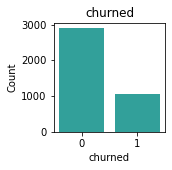

   churned  Count  Percent
0        0   2897    73.47
1        1   1046    26.53
_________________________________________________________________


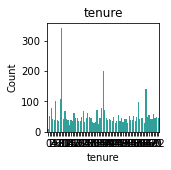

    tenure  Count  Percent
1        9    341     8.65
72      36    201     5.10
2       64    141     3.58
3        8    108     2.74
4        5    102     2.59
..     ...    ...      ...
31      30     29     0.74
59      63     28     0.71
36      33     26     0.66
44      14     24     0.61
0        0      8     0.20

[73 rows x 3 columns]
_________________________________________________________________


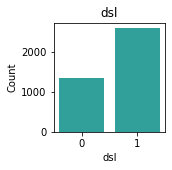

   dsl  Count  Percent
0    1   2592    65.74
1    0   1351    34.26
_________________________________________________________________


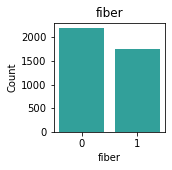

   fiber  Count  Percent
0      0   2191    55.57
1      1   1752    44.43
_________________________________________________________________


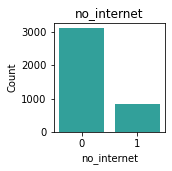

   no_internet  Count  Percent
0            0   3103     78.7
1            1    840     21.3
_________________________________________________________________


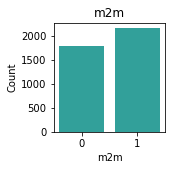

   m2m  Count  Percent
1    1   2160    54.78
0    0   1783    45.22
_________________________________________________________________


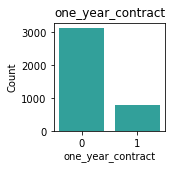

   one_year_contract  Count  Percent
0                  0   3132    79.43
1                  1    811    20.57
_________________________________________________________________


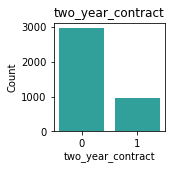

   two_year_contract  Count  Percent
0                  0   2971    75.35
1                  1    972    24.65
_________________________________________________________________


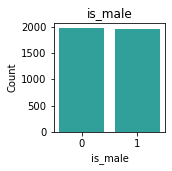

   is_male  Count  Percent
1        0   1973    50.04
0        1   1970    49.96
_________________________________________________________________


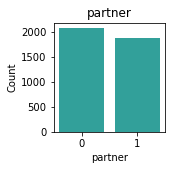

   partner  Count  Percent
0        0   2066     52.4
1        1   1877     47.6
_________________________________________________________________


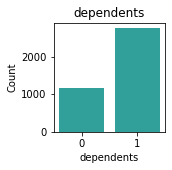

   dependents  Count  Percent
0           1   2763    70.07
1           0   1180    29.93
_________________________________________________________________


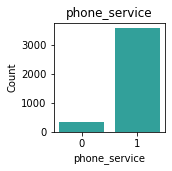

   phone_service  Count  Percent
1              1   3584     90.9
0              0    359      9.1
_________________________________________________________________


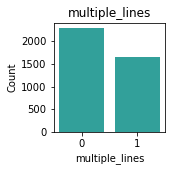

   multiple_lines  Count  Percent
0               0   2286    57.98
1               1   1657    42.02
_________________________________________________________________


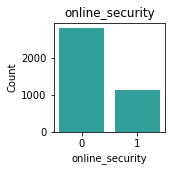

   online_security  Count  Percent
0                0   2812    71.32
1                1   1131    28.68
_________________________________________________________________


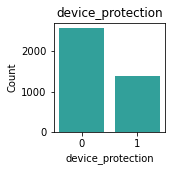

   device_protection  Count  Percent
0                  0   2568    65.13
1                  1   1375    34.87
_________________________________________________________________


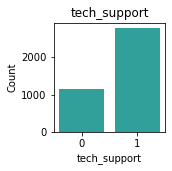

   tech_support  Count  Percent
0             1   2779    70.48
1             0   1164    29.52
_________________________________________________________________


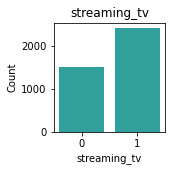

   streaming_tv  Count  Percent
0             1   2423    61.45
1             0   1520    38.55
_________________________________________________________________


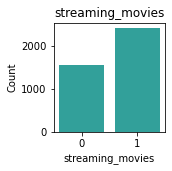

   streaming_movies  Count  Percent
0                 1   2402    60.92
1                 0   1541    39.08
_________________________________________________________________


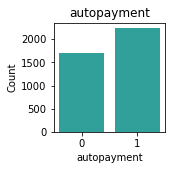

   autopayment  Count  Percent
0            1   2240    56.81
1            0   1703    43.19
_________________________________________________________________


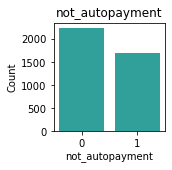

   not_autopayment  Count  Percent
1                0   2240    56.81
0                1   1703    43.19
_________________________________________________________________


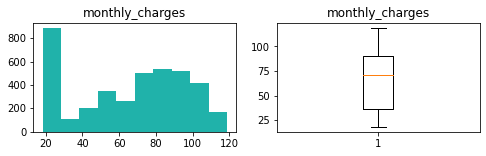

count    3943.000000
mean       65.150710
std        30.030427
min        18.250000
25%        36.475000
50%        70.700000
75%        89.950000
max       118.750000
Name: monthly_charges, dtype: float64


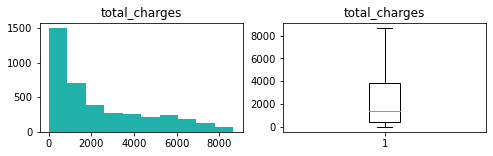

count    3943.000000
mean     2287.059422
std      2272.515282
min         0.000000
25%       393.050000
50%      1386.900000
75%      3810.675000
max      8672.450000
Name: total_charges, dtype: float64


In [10]:
explore.explore_univariate(train, cat_vars, quant_vars)

#### Bivariate Stats

In [11]:
cat_vars = cat_vars[1:]

tenure 
_____________________

         chi2       p-value  degrees of freedom
0  673.448746  1.779664e-98                  72

observed:
 churned     0     1   All
tenure                   
0           8     0     8
1         128   213   341
2          61    80   141
3          54    54   108
4          50    52   102
...       ...   ...   ...
69         42     2    44
70         57     5    62
71         96     3    99
72        197     4   201
All      2897  1046  3943

[74 rows x 3 columns]

expected:
              0          1
0     5.877758   2.122242
1   250.539437  90.460563
2   103.595486  37.404514
3    79.349734  28.650266
4    74.941415  27.058585
..         ...        ...
68   38.205427  13.794573
69   32.327669  11.672331
70   45.552625  16.447375
71   72.737256  26.262744
72  147.678671  53.321329

[73 rows x 2 columns]


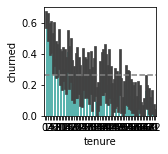


_____________________

dsl 
_____________________

        chi2       p-value  degrees of freedom
0  58.808096  1.738246e-14                   1

observed:
 churned     0     1   All
dsl                      
0        1803   789  2592
1        1094   257  1351
All      2897  1046  3943

expected:
              0           1
0  1904.393609  687.606391
1   992.606391  358.393609


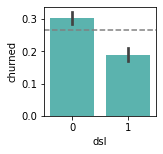


_____________________

fiber 
_____________________

         chi2       p-value  degrees of freedom
0  363.780774  4.230027e-81                   1

observed:
 churned     0     1   All
fiber                    
0        1873   318  2191
1        1024   728  1752
All      2897  1046  3943

expected:
              0           1
0  1609.770987  581.229013
1  1287.229013  464.770987


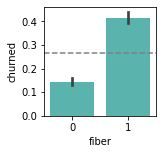


_____________________

no_internet 
_____________________

         chi2       p-value  degrees of freedom
0  202.021901  7.561684e-46                   1

observed:
 churned         0     1   All
no_internet                  
0            2118   985  3103
1             779    61   840
All          2897  1046  3943

expected:
              0           1
0  2279.835405  823.164595
1   617.164595  222.835405


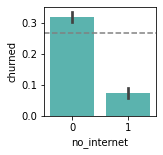


_____________________

m2m 
_____________________

         chi2        p-value  degrees of freedom
0  663.836694  2.187516e-146                   1

observed:
 churned     0     1   All
m2m                      
0        1666   117  1783
1        1231   929  2160
All      2897  1046  3943

expected:
              0           1
0  1310.005326  472.994674
1  1586.994674  573.005326


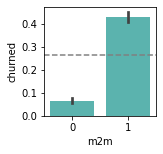


_____________________

one_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  121.756326  2.610042e-28                   1

observed:
 churned               0     1   All
one_year_contract                  
0                  2177   955  3132
1                   720    91   811
All                2897  1046  3943

expected:
              0           1
0  2301.142277  830.857723
1   595.857723  215.142277


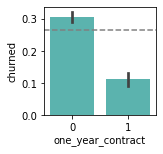


_____________________

two_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  374.955079  1.560770e-83                   1

observed:
 churned               0     1   All
two_year_contract                  
0                  1951  1020  2971
1                   946    26   972
All                2897  1046  3943

expected:
              0           1
0  2182.852397  788.147603
1   714.147603  257.852397


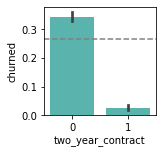


_____________________

is_male 
_____________________

       chi2   p-value  degrees of freedom
0  0.006322  0.936628                   1

observed:
 churned     0     1   All
is_male                  
0        1449   521  1970
1        1448   525  1973
All      2897  1046  3943

expected:
             0          1
0  1447.39792  522.60208
1  1449.60208  523.39792


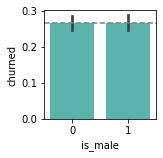


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  99.970619  1.546747e-23                   1

observed:
 churned     0     1   All
partner                  
0        1379   687  2066
1        1518   359  1877
All      2897  1046  3943

expected:
              0           1
0  1517.931017  548.068983
1  1379.068983  497.931017


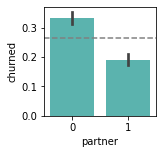


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  104.107639  1.916180e-24                   1

observed:
 churned        0     1   All
dependents                  
0           1900   863  2763
1            997   183  1180
All         2897  1046  3943

expected:
              0           1
0  2030.030687  732.969313
1   866.969313  313.030687


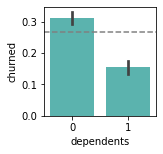


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.001099  0.973553                   1

observed:
 churned           0     1   All
phone_service                  
0               264    95   359
1              2633   951  3584
All            2897  1046  3943

expected:
              0           1
0   263.764393   95.235607
1  2633.235607  950.764393


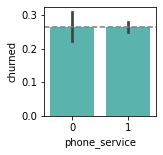


_____________________

multiple_lines 
_____________________

       chi2   p-value  degrees of freedom
0  1.717089  0.190068                   1

observed:
 churned            0     1   All
multiple_lines                  
0               1698   588  2286
1               1199   458  1657
All             2897  1046  3943

expected:
              0           1
0  1679.569363  606.430637
1  1217.430637  439.569363


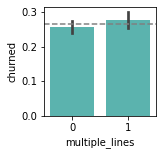


_____________________

online_security 
_____________________

         chi2       p-value  degrees of freedom
0  132.877053  9.618794e-31                   1

observed:
 churned             0     1   All
online_security                  
0                1921   891  2812
1                 976   155  1131
All              2897  1046  3943

expected:
              0           1
0  2066.031955  745.968045
1   830.968045  300.031955


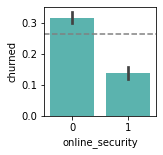


_____________________

device_protection 
_____________________

        chi2       p-value  degrees of freedom
0  26.695574  2.381665e-07                   1

observed:
 churned               0     1   All
device_protection                  
0                  1818   750  2568
1                  1079   296  1375
All                2897  1046  3943

expected:
              0           1
0  1886.760335  681.239665
1  1010.239665  364.760335


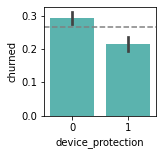


_____________________

tech_support 
_____________________

        chi2       p-value  degrees of freedom
0  96.606082  8.458805e-23                   1

observed:
 churned          0     1   All
tech_support                  
0             1917   862  2779
1              980   184  1164
All           2897  1046  3943

expected:
              0           1
0  2041.786203  737.213797
1   855.213797  308.786203


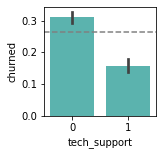


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  10.767162  0.001033                   1

observed:
 churned          0     1   All
streaming_tv                  
0             1825   598  2423
1             1072   448  1520
All           2897  1046  3943

expected:
             0          1
0  1780.22597  642.77403
1  1116.77403  403.22597


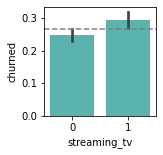


_____________________

streaming_movies 
_____________________

        chi2   p-value  degrees of freedom
0  11.416071  0.000728                   1

observed:
 churned              0     1   All
streaming_movies                  
0                 1811   591  2402
1                 1086   455  1541
All               2897  1046  3943

expected:
              0           1
0  1764.796855  637.203145
1  1132.203145  408.796855


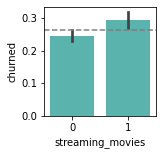


_____________________

autopayment 
_____________________

         chi2       p-value  degrees of freedom
0  182.036408  1.741018e-41                   1

observed:
 churned         0     1   All
autopayment                  
0            1460   780  2240
1            1437   266  1703
All          2897  1046  3943

expected:
              0           1
0  1645.772255  594.227745
1  1251.227745  451.772255


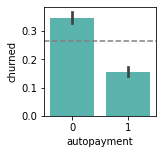


_____________________

not_autopayment 
_____________________

         chi2       p-value  degrees of freedom
0  182.036408  1.741018e-41                   1

observed:
 churned             0     1   All
not_autopayment                  
0                1437   266  1703
1                1460   780  2240
All              2897  1046  3943

expected:
              0           1
0  1251.227745  451.772255
1  1645.772255  594.227745


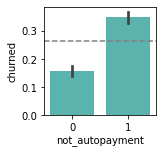


_____________________

monthly_charges 
____________________



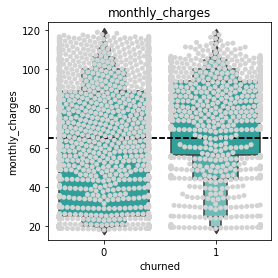

          count       mean        std    min      25%    50%    75%     max
churned                                                                    
0        2897.0  61.850846  31.160324  18.25  25.2000  65.25  89.10  118.75
1        1046.0  74.290010  24.439527  18.95  56.3125  79.55  93.85  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1176266.5, pvalue=6.775715811014378e-27)

____________________

total_charges 
____________________



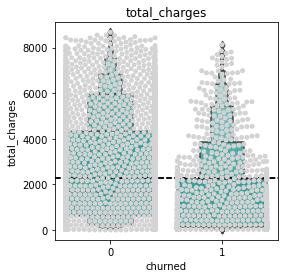

          count         mean          std    min     25%      50%      75%  \
churned                                                                      
0        2897.0  2582.246686  2340.647132   0.00  605.25  1682.05  4326.80   
1        1046.0  1469.509226  1840.557584  19.25  124.25   661.95  2235.65   

             max  
churned           
0        8672.45  
1        8127.60   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2008422.0, pvalue=4.4820761482106014e-55)

____________________



In [13]:
explore.explore_bivariate(train, 'churned', cat_vars, quant_vars)

#### Multivariate Stats

    _ Need to drop some columns for the multivariate stats.

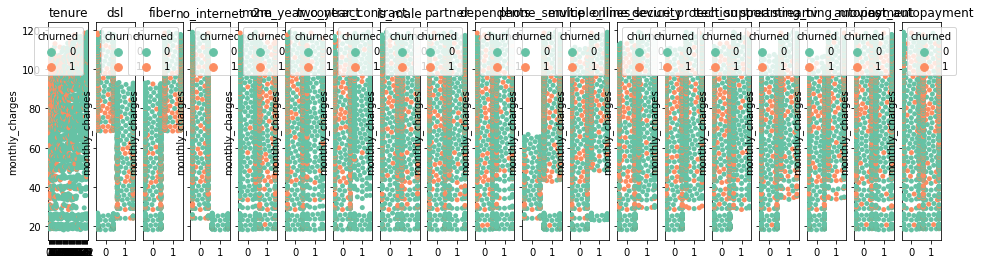

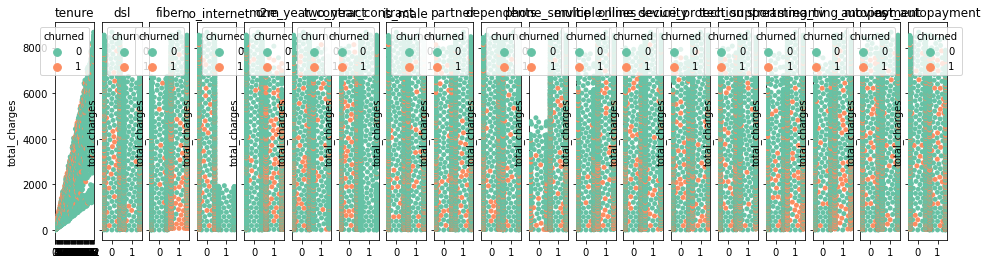

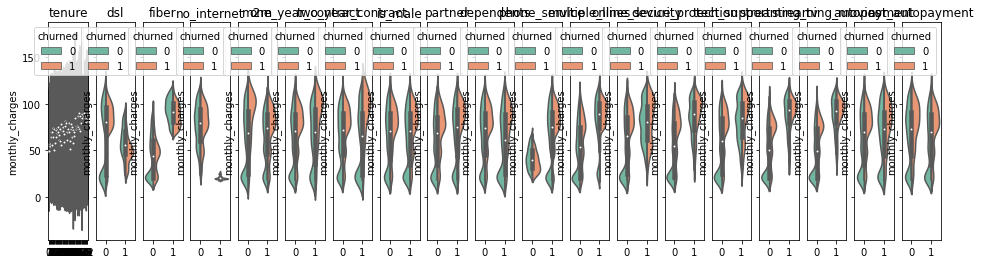

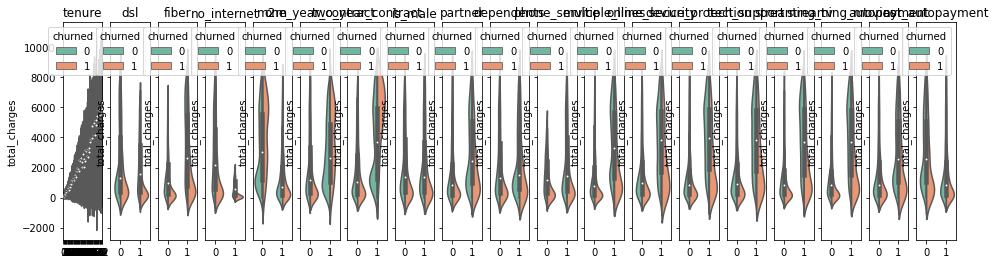

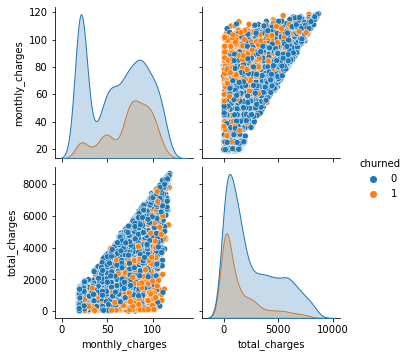

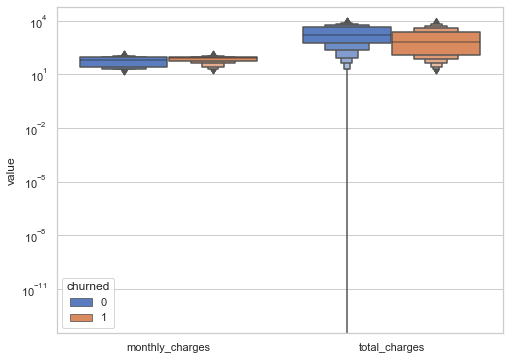

In [14]:
target = 'churned'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

# Notes and test code.

In [ ]:
#used to test adding two columns and renaming it.
df['auto_payment'] = df['bank_transfer'] + df['credit_card']

In [ ]:
#split data
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [ ]:
df = prepare.train_validate_test_split(df, 'churned')

In [ ]:
#split into train, validate, test
train, validate, test = train_validate_test_split()
train.head(2)

In [ ]:
print(train.shape, validate.shape, test.shape)

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features.
X_train = train.drop(columns=["churned"])
y_train = train.churned

X_validate = validate.drop(columns=["churned"])
y_validate = validate.churned

X_test = test.drop(columns=["churned"])
y_test = test.churned

In [ ]:
df.info()

In [ ]:
#Looking for unique values in "types"
df.contract_type.unique()

In [ ]:
#check to see if there are any duplicates by 'customer_id'
df.duplicated(subset = 'internet_service').unique()

In [ ]:
#find empty values. Tried isna, isnull, notna, notnull but did not shown any matches.
df.eq(' ').sum()

In [ ]:
#replaces empty values with a 0 in total charges.
df = df.replace({'total_charges': ' '}, 0)
df.head()

In [ ]:
#verify empty values in total_charges have been replace.
df.eq(' ').sum()

In [ ]:
df = df.drop(['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], axis = 1)
df.head(2)

In [ ]:
df.shape

In [ ]:
#convert 'total_charges' to float and validate change.
df['total_charges'] = df['total_charges'].astype(float)
df.dtypes

In [ ]:
df = df.replace(to_replace = 'No internet service', value = 'No')
df

In [ ]:
df = df.replace(to_replace = 'No phone service', value = 'No')
df

# Encode

In [ ]:
#get_dummies creates a seperate df of booleans for the identified columns below. Cleaning for the decission tree.
dummy_df = pd.get_dummies(df[['dependents','phone_service','online_security','online_backup','payment_type','internet_service_type','contract_type','gender','partner','multiple_lines','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn']], dummy_na=False, drop_first=[True, True])
#set 'drop_first' to 'False' to encode multiple types of the below listed columns.
dummy_df_types = pd.get_dummies(df[['payment_type','internet_service_type','contract_type',]], dummy_na=False, drop_first=False)

In [ ]:
#now drop the above two columns...
df = df.drop(columns=['dependents','phone_service','online_security','online_backup','payment_type','internet_service_type','contract_type','gender','partner','multiple_lines','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn'])
#...and concatanate the dummies df with the prep's df.
df = pd.concat([df, dummy_df, dummy_df_types], axis=1)
df.head()